In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'



def save_and_show(filename):
    plt.tight_layout()
    # 1. Save FIRST
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    # 2. Then Show
    plt.show()
    # 3. Close to clear memory
    plt.close()
# الألوان
color_red = '#912f46'     # Direct Cost (MOH)
color_gold = '#b58500'    # Indirect Cost (Economy)
color_green = '#286140'   # Savings (Positive)

   [Output] Chart saved as: True Cost Chart.png


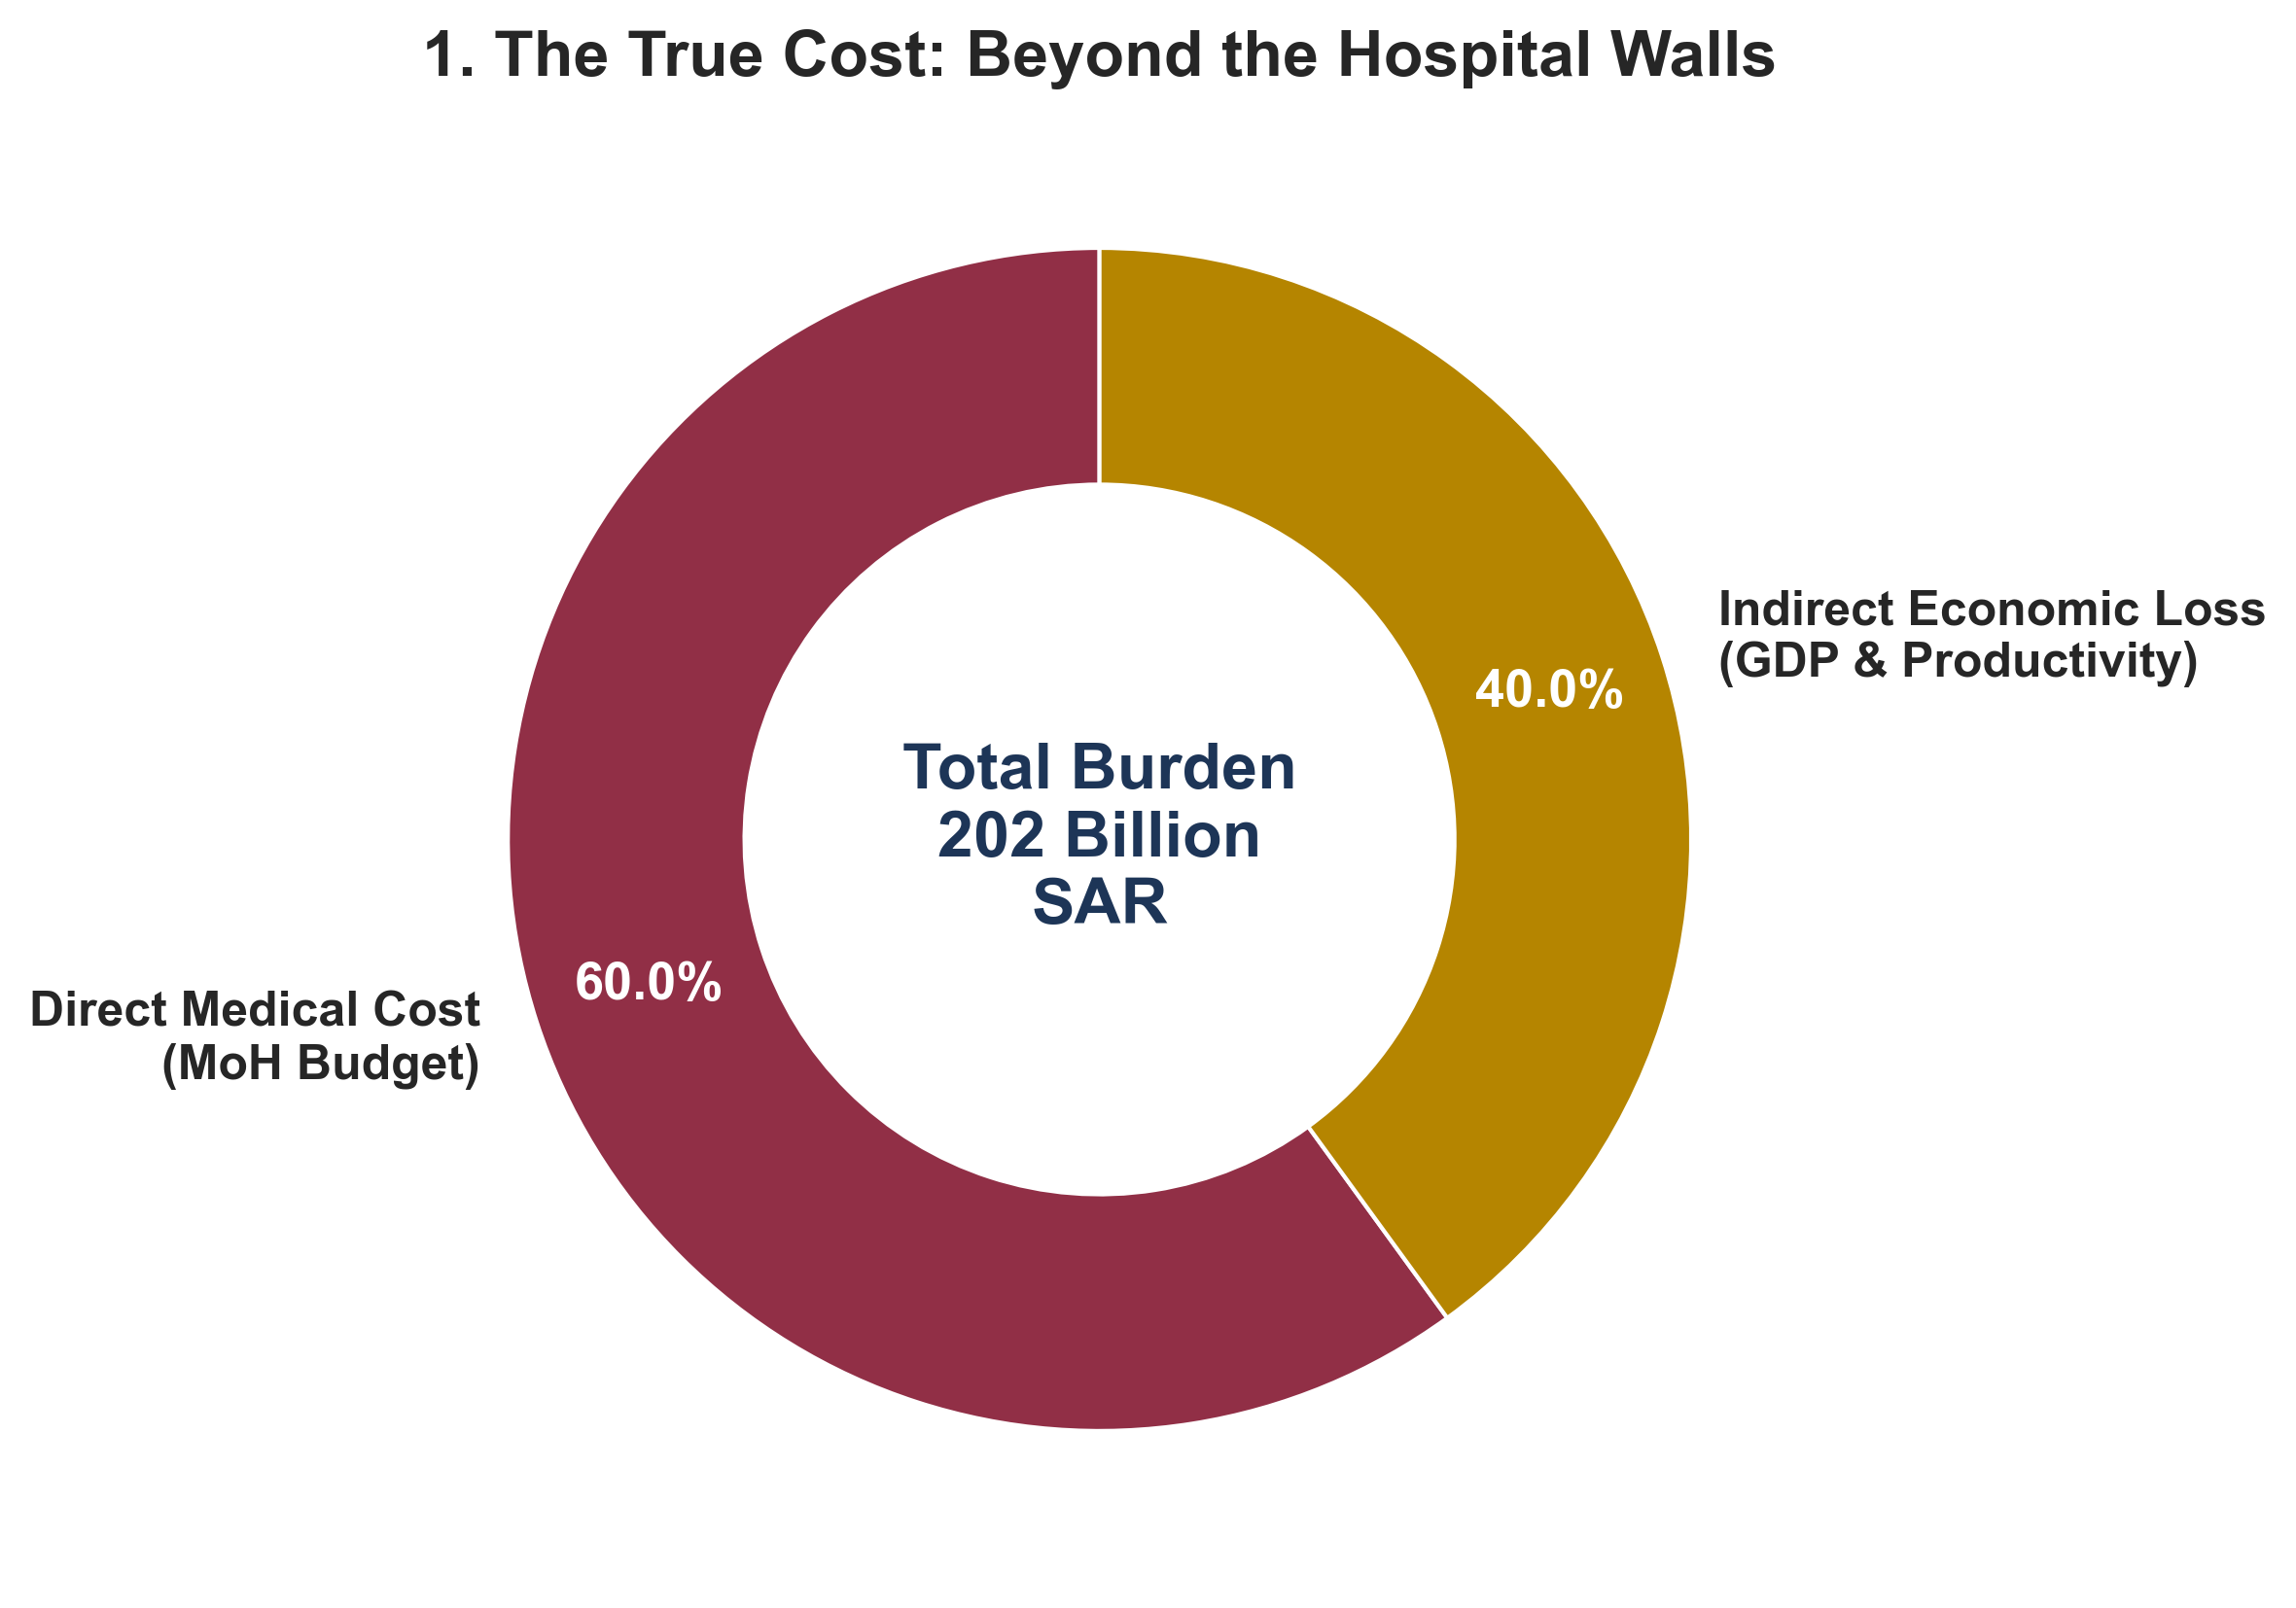

In [5]:
direct_cost_2030 = 121.5
indirect_cost_2030 = (direct_cost_2030 / 0.60) * 0.40
total_societal_cost = direct_cost_2030 + indirect_cost_2030

# الرسم البياني الأول
fig1, ax1 = plt.subplots(figsize=(8, 8))

labels = ['Direct Medical Cost\n(MoH Budget)', 'Indirect Economic Loss\n(GDP & Productivity)']
sizes = [direct_cost_2030, indirect_cost_2030]
colors = [color_red, color_gold]

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, pctdistance=0.80, 
                                   wedgeprops=dict(width=0.4, edgecolor='w'))

# تنسيق النصوص
plt.setp(texts, size=12, weight="bold")
plt.setp(autotexts, size=13, weight="bold", color="white")

# وضع الرقم الإجمالي في المنتصف
ax1.text(0, 0, f'Total Burden\n{total_societal_cost:.0f} Billion\nSAR', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='#1d3557')

ax1.set_title('1. The True Cost: Beyond the Hospital Walls', fontsize=16, fontweight='bold')

plt.tight_layout()
save_and_show("True Cost Chart.png")
plt.show()

   [Output] Chart saved as: saving distribution by dept.png


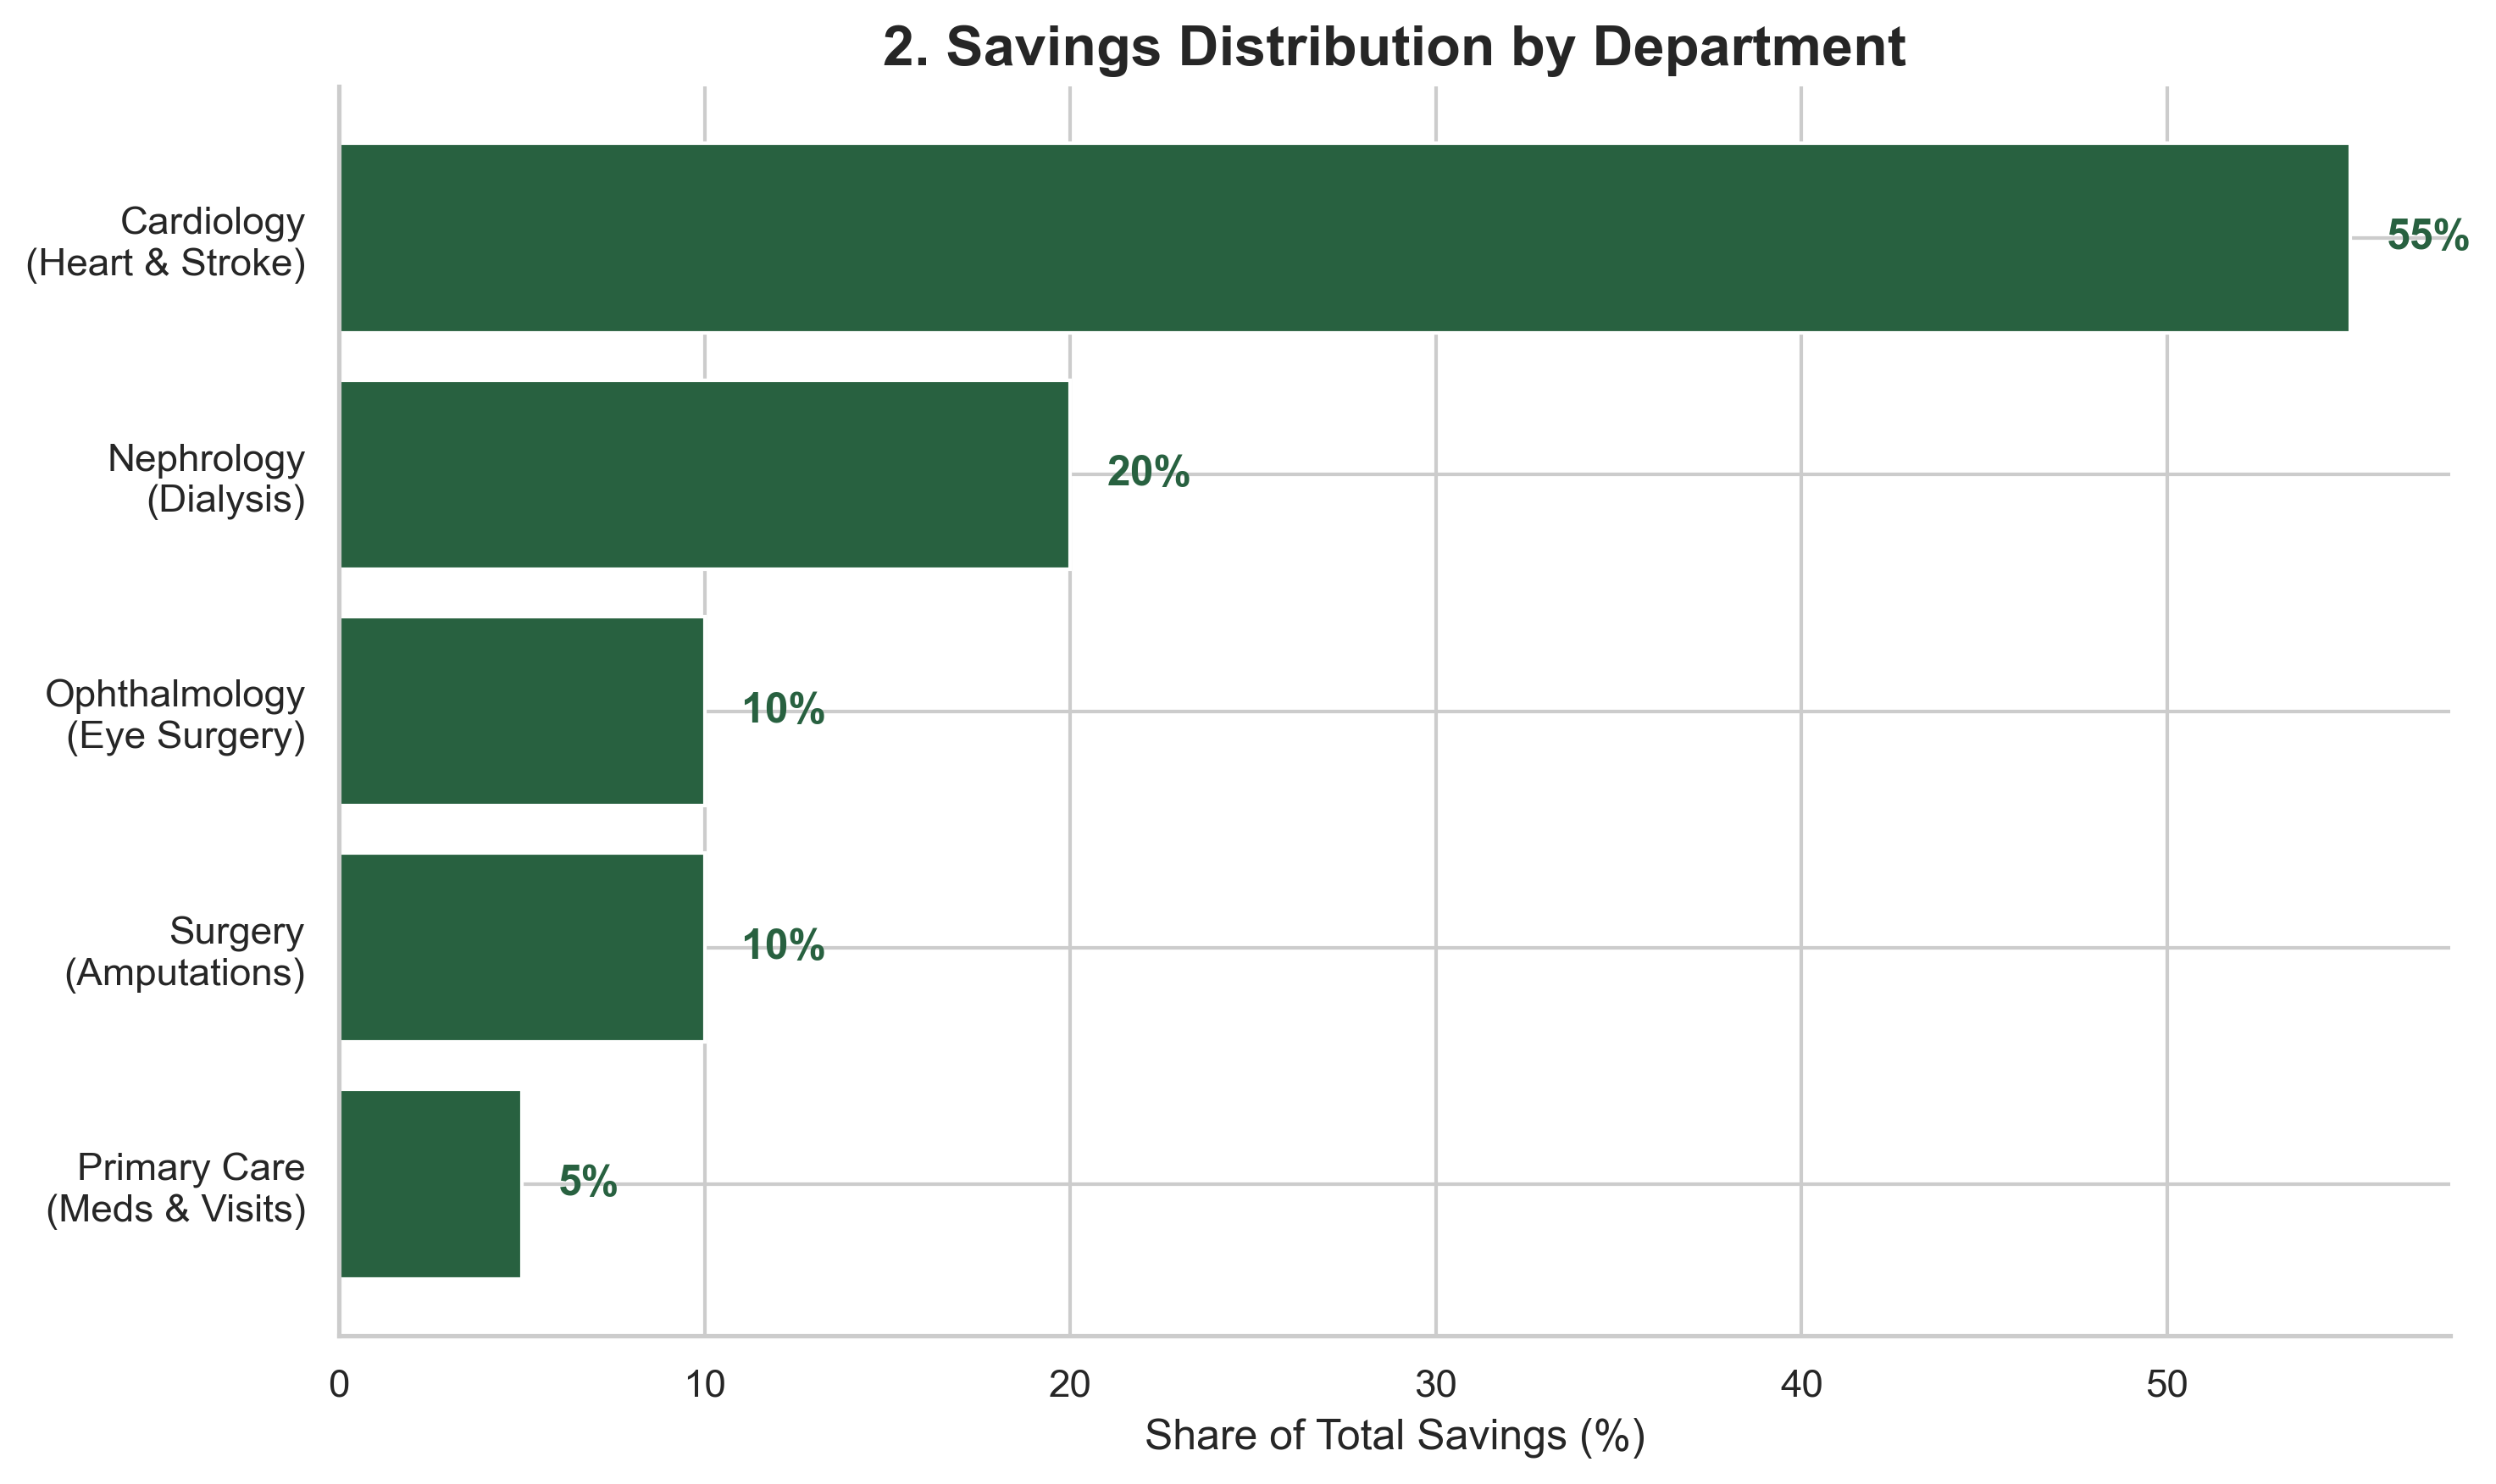

<Figure size 1920x1440 with 0 Axes>

In [6]:
dept_data = {
    'Department': ['Cardiology\n(Heart & Stroke)', 'Nephrology\n(Dialysis)', 'Ophthalmology\n(Eye Surgery)', 'Surgery\n(Amputations)', 'Primary Care\n(Meds & Visits)'],
    'Savings_Share': [55, 20, 10, 10, 5]
}
df_dept = pd.DataFrame(dept_data).sort_values('Savings_Share', ascending=True)

# حسابات الجدوى الاقتصادية
total_screened = 722714
potential_savings_sar = 236.3 * 1_000_000
break_even_cost = potential_savings_sar / total_screened

# الرسم البياني الثاني
fig2, ax2 = plt.subplots(figsize=(10, 6))

bars = ax2.barh(df_dept['Department'], df_dept['Savings_Share'], color=color_green)

ax2.set_title('2. Savings Distribution by Department', fontsize=16, fontweight='bold')
ax2.set_xlabel('Share of Total Savings (%)')

# إضافة النسب
for bar in bars:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width}%', va='center', fontweight='bold', fontsize=12, color=color_green)

# إزالة الحدود
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

save_and_show("saving distribution by dept.png")

plt.tight_layout()
plt.show()

In [9]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

def add_economic_burden_slides_to_existing_file_final():
    # 1. تحميل ملفك الأصلي
    input_file = "Capstone POD8.pptx"
    output_file = "Capstone_FINAL_Economic_Slides.pptx"
    
    try:
        prs = Presentation(input_file)
    except FileNotFoundError:
        print(f"Error: Could not find '{input_file}'. Make sure the file is in the same folder.")
        return

    # الألوان المستخدمة في التحليل
    COLOR_GREEN = RGBColor(40, 97, 64)
    COLOR_RED = RGBColor(145, 47, 70)
    
    # دالة لإضافة شريحة بنفس تنسيق الملف
    def add_custom_slide(title_text, insights, layout_index=5):
        # اختيار الـ Layout المناسب من الماستر (عادةً 5 هو Title Only)
        slide_layout = prs.slide_layouts[layout_index] 
        slide = prs.slides.add_slide(slide_layout)
        
        # 1. العنوان
        if slide.shapes.title:
            slide.shapes.title.text = title_text
        else:
            title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.5), Inches(9), Inches(1))
            title_box.text_frame.text = title_text
            
        # 2. إضافة النصوص (Insights) في الأسفل لتترك مساحة للتشارتات
        textbox = slide.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(2))
        tf = textbox.text_frame
        tf.word_wrap = True
        
        for point in insights:
            p = tf.add_paragraph()
            p.text = point
            p.font.size = Pt(16)
            p.font.name = 'Calibri' # افتراض خط مناسب
            p.space_after = Pt(8)
            p.level = 1 # Bullet point level

        # 3. مربعات التشارت (Placeholders)
        # يسار (الشكل 1)
        chart_box1 = slide.shapes.add_shape(1, Inches(0.5), Inches(1.8), Inches(4.2), Inches(3.5))
        chart_box1.text = "CHART 1: Macro-Fiscal Gap\n(Paste Left Chart Here)"
        chart_box1.fill.solid()
        chart_box1.fill.fore_color.rgb = RGBColor(240, 240, 240)
        chart_box1.line.color.rgb = COLOR_RED
        
        # يمين (الشكل 2)
        chart_box2 = slide.shapes.add_shape(1, Inches(5.3), Inches(1.8), Inches(4.2), Inches(3.5))
        chart_box2.text = "CHART 2: Cost of Inaction / Hidden Burden\n(Paste Right Chart Here)"
        chart_box2.fill.solid()
        chart_box2.fill.fore_color.rgb = RGBColor(240, 240, 240)
        chart_box2.line.color.rgb = COLOR_RED

    # ==========================================
    # الشريحة الأولى: الأزمة والعبء (The Crisis)
    # ==========================================
    slide1_text = [
        "The Total Societal Cost of chronic diseases is projected to reach **202.5 Billion SAR** by 2030.",
        "This cost growth (63%) will quickly outpace the projected MoH budget of **130.4 Billion SAR**.",
        "The hidden economic toll amounts to **81 Billion SAR** lost annually from the GDP due to low productivity and early retirement (Indirect Cost)."
    ]
    add_custom_slide("The Escalating Fiscal Gap & National Crisis", slide1_text)

    # ==========================================
    # الشريحة الثانية: الحل والعائد (The Solution)
    # ==========================================
    # نستخدم نفس دالة إضافة الشريحة لكن نغير محتوى المربعات التوضيحية
    slide2_layout = prs.slide_layouts[5] 
    slide2 = prs.slides.add_slide(slide2_layout)
    
    # 1. العنوان
    if slide2.shapes.title:
        slide2.shapes.title.text = "Economic Feasibility: High Return on Prevention (ROI)"
    
    # 2. إضافة النصوص (Insights)
    slide2_text = [
        "The required initial investment (Total Program Cost) is **160.5 Million SAR** (based on 222 SAR/test).",
        "The program generates a direct annual saving of **236.3 Million SAR**.",
        "This translates to a **75.8 Million SAR net profit** from Year 1, making it a self-funding investment."
    ]
    
    textbox2 = slide2.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(2))
    tf2 = textbox2.text_frame
    for point in slide2_text:
        p = tf2.add_paragraph()
        p.text = point
        p.font.size = Pt(16)
        p.font.name = 'Calibri'
        p.space_after = Pt(8)
        p.level = 1 

    # 3. مربعات التشارت (Placeholders)
    # يسار (الشكل 1)
    chart_box3 = slide2.shapes.add_shape(1, Inches(0.5), Inches(1.8), Inches(4.2), Inches(3.5))
    chart_box3.text = "CHART 3: ROI Analysis (Cost vs. Savings)\n(Paste Left Chart Here)"
    chart_box3.fill.solid()
    chart_box3.fill.fore_color.rgb = RGBColor(240, 240, 240)
    chart_box3.line.color.rgb = COLOR_GREEN

    # يمين (الشكل 2)
    chart_box4 = slide2.shapes.add_shape(1, Inches(5.3), Inches(1.8), Inches(4.2), Inches(3.5))
    chart_box4.text = "CHART 4: Net Profit / Break-Even\n(Paste Right Chart Here)"
    chart_box4.fill.solid()
    chart_box4.fill.fore_color.rgb = RGBColor(240, 240, 240)
    chart_box4.line.color.rgb = COLOR_GREEN

    # حفظ الملف
    prs.save(output_file)
    print(f"تم إنشاء الملف بنجاح: {output_file}")
    print("افتح الملف وستجد الشريحتين الجديدتين في النهاية، قم بسحبهما تحت قسم Data-driven Policy Recommendations.")

if __name__ == "__main__":
    add_economic_burden_slides_to_existing_file_final()

تم إنشاء الملف بنجاح: Capstone_FINAL_Economic_Slides.pptx
افتح الملف وستجد الشريحتين الجديدتين في النهاية، قم بسحبهما تحت قسم Data-driven Policy Recommendations.
